## Leapfrog

Text(0.5, 0.98, 'Gaussiana e Retângulo (periódica), $\\Delta$t = 250 segundos, $\\Delta$x = 5000 metros, CFL = 0.5.')

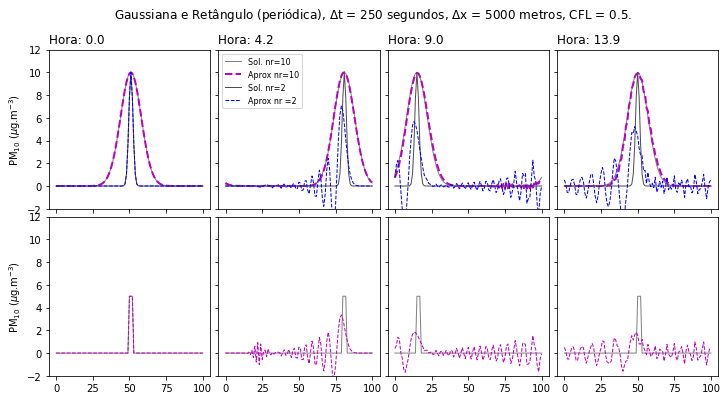

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *

# Condições do exercício
# ----------------------
Nx, dx, Nt, dt, U  = 101, 5000, 201, 250, 10, 
hora = round((Nt-1)*dt/3600,1)
x, _ = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
t, _ = np.linspace(0, (Nt-1)*dt, Nt, retstep = True)
CFL     = U*dt/dx       # Courant number  CFL = 1, dt = 500
ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"

# Função (Gaussiana, Retângulo), 
# Cproximação (ordem1, ordem4, leapfrog, Matsuno, Crank, RK4)
# Contorno (fixa, periódica, radiacional)
# --------------------------------------
cond_front  =  "periódica"          # fixa, periódica, radiacional
aprox       =  'leapfrog'

leap = {}
leap['gau'] = {"s10": sol_analytical("Gaussiana", x, U, Nx, Nt, 10, dt, t),
               "s2": sol_analytical("Gaussiana", x, U, Nx, Nt, 2, dt, t),
               "n10": sol_num(aprox, cond_front, "Gaussiana", CFL, 10, Nx, Nt, x, dx, U, t, dt),
               "n2": sol_num(aprox, cond_front, "Gaussiana", CFL, 2, Nx, Nt, x, dx, U, t, dt)}
leap['ret'] = {"s": sol_analytical("Retângulo", x, U, Nx, Nt, 10, dt, t),
               "n": sol_num(aprox, cond_front, "Retângulo", CFL, 10, Nx, Nt, x, dx, U, t, dt)}

fig, ax = plt.subplots(2,4, figsize=(12,6), sharex=True, sharey=True, gridspec_kw={'hspace':0.05, 'wspace':0.05})
for i, n in enumerate([0, 60, 130, 200]):
    ax[0,i].plot(leap['gau']['s10'][:,n], color='0.3', label="Sol. nr=10", lw=1, alpha =0.7)
    ax[0,i].plot(leap['gau']['n10'][:,n], color='m', label="Aprox nr=10", lw=2, linestyle='dashed')
    ax[0,i].plot(leap['gau']['s2'][:,n], color='0.3', label="Sol. nr=2", lw=1)
    ax[0,i].plot(leap['gau']['n2'][:,n], color='b', label="Aprox nr =2", lw=1, linestyle='dashed')
    ax[0,i].set_title(f"Hora: {round((n*dt/3600),1)}", loc='left')
    ax[1,i].plot(leap['ret']['s'][:,n], color='0.3', label="Sol.", lw=1, alpha =0.7)
    ax[1,i].plot(leap['ret']['n'][:,n], color='m', label="Aprox.", lw=1, linestyle='dashed')
    for j in [0,1]:
        ax[0,i].set_ylim(-2, 12)
        ax[j,0].set_ylabel(ylabel)
    if i == 1:
        ax[0,i].legend(ncol=1, fontsize=8)
plt.suptitle("Gaussiana e Retângulo "+f"({cond_front}), $\Delta$t = {dt} segundos, $\Delta$x = {dx} metros, CFL = {CFL}.")
#fig.savefig("fig/" + aprox[:3] + "_all_" + cond_front[:3] +"_" + str(hora) +".png", 
#           dpi = 300, bbox_inches='tight', facecolor='w')

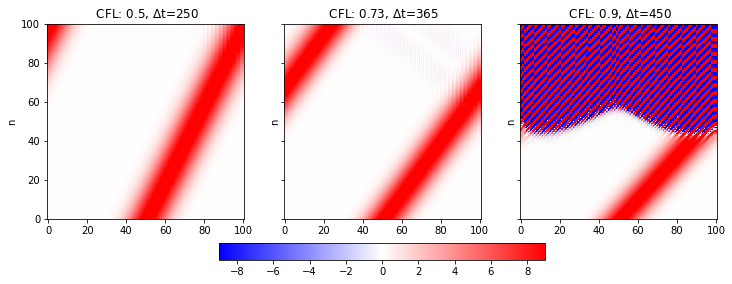

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *

def cond(dt):
    """
    Função (Gaussiana, Retângulo)
    Aproximação (ordem1, ordem4, leapfrog, Matsuno, Crank, RK4)
    Contorno (fixa, periódica, radiacional) somente para leapfrog os demais so periódica
    """
    Nx, dx, Nt, U  = 101, 5000, 101, 10
    hora = round((Nt-1)*dt/3600,1)
    x, _ = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
    t, _ = np.linspace(0, (Nt-1)*dt, Nt, retstep = True)
    CFL     = U*dt/dx       # Courant number  CFL = 1, dt = 500
    fun, aprox, cond_front  =  "Gaussiana", "ordem4", "periódica"
    ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"
    dP, nr =  30, 10   

    C_r = sol_analytical(fun, x, U, Nx, Nt, nr, dt, t)
    C = sol_num(aprox, cond_front, fun, CFL, nr, Nx, Nt, x, dx, U, t, dt)
    return C_r, C, CFL, dt

O4_s = {}
O4_n = {}
CFLs = []
deltas_t = [250, 365, 450]
for dt in deltas_t:
    O4_s[dt], O4_n[dt], CFL, dt = cond(dt)
    CFLs.append(CFL)

fig, axes = plt.subplots(1, 3,figsize=(12,5), sharey=True)
for ax, dt, CFL in zip(axes.flatten(), deltas_t, CFLs):
    im = ax.imshow(O4_n[dt].T, cmap="bwr", vmax=9, vmin=-9)
    ax.set_title(f" CFL: {round(CFL,3)}"+r", $\Delta$t="+f"{dt}")
    ax.set_ylim(0,100)
    ax.set_ylabel("n")
fig.colorbar(im, ax=axes[:],orientation="horizontal", fraction=0.06, pad=0.09)
fig.savefig("fig/" + 'o4_deltas_t' + 'per' +".png", 
            dpi = 300, bbox_inches='tight', facecolor='w')

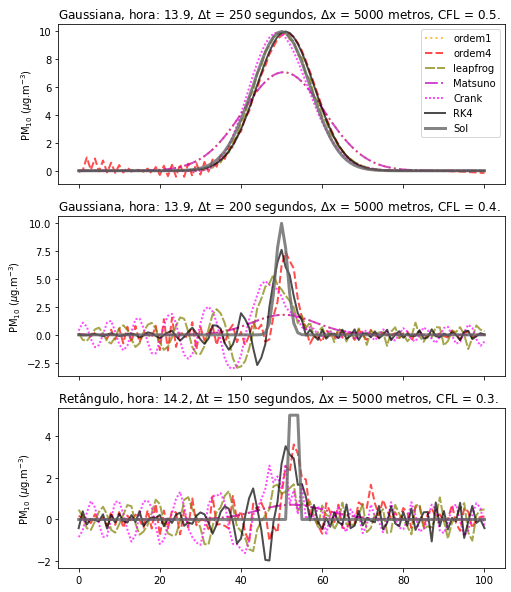

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *

def cond_fun_dt(fun, cond_front, dt, Nt, nr, aproxs):
    Nx, dx, U  = 101, 5000, 10
    hora = round((Nt-1)*dt/3600,1)
    x, _ = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
    t, _ = np.linspace(0, (Nt-1)*dt, Nt, retstep = True)
    CFL     = U*dt/dx
    
    C_n ={}
    for aprox in aproxs:
        if aprox == 'Sol':
            C_n[aprox] = sol_analytical(fun, x, U, Nx, Nt, nr, dt, t)
        else:
            C_n[aprox] = sol_num(aprox, cond_front, fun, CFL, nr, Nx, Nt, x, dx, U, t, dt)
    
    return C_n, CFL, hora

Res = {"G10":{}, "G2":{}, "R":{} }  # numérico
nrs = [10,2,1]
funs = ["Gaussiana", "Gaussiana", "Retângulo"]
deltas = [250, 200, 150]
Nts    = [201, 251, 341]
CFLs = []
horas = []
ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"
cond_front = "periódica"
esquemas = {'ordem1':"orange", 'ordem4':"r", 'leapfrog':"olive",
            'Matsuno':"m", 'Crank':"magenta", 'RK4':"k", 'Sol':"0.4"}
lineas = {'ordem1':"dotted", 'ordem4':"dashed", 'leapfrog':(0,(5,1)),
            'Matsuno':"dashdot", 'Crank':(0,(1,1)), 'RK4':"solid", 'Sol':"solid"}

for k, nr, fun, dt, Nt in zip(Res.keys(), nrs, funs, deltas, Nts):
    Res[k], CFL, hora = cond_fun_dt(fun, cond_front, dt, Nt, nr, esquemas.keys())
    CFLs.append(CFL)
    horas.append(hora)

fig, axes = plt.subplots(3, figsize=(8,10), sharex=True)
for fun, dt, CFL, r, n, ax in zip(funs, deltas, CFLs, Res.keys(), Nts, axes.flatten()):
    for aprox, col in esquemas.items():
        if aprox =='Sol':
            ax.plot(Res[r][aprox][:, n-1], label=aprox, color=col, alpha=.8, lw=3, linestyle=lineas[aprox])
        else:
            ax.plot(Res[r][aprox][:, n-1], label=aprox, color=col, alpha=.7, lw=2, linestyle=lineas[aprox])
   
    ax.set_ylabel(ylabel)
    ax.set_title(fun+f", hora: {round(((n-1)*dt/3600),1)}, $\Delta$t = {dt} segundos, $\Delta$x = {5000} metros, CFL = {CFL}.",loc='left')
#plt.suptitle(fun+f" ({cond_front})")
axes[0].legend()
fig.savefig("fig/" + 'all_periodic'+".png", 
            dpi = 300, bbox_inches='tight', facecolor='w')



## Ordem 1 vs leapfrog

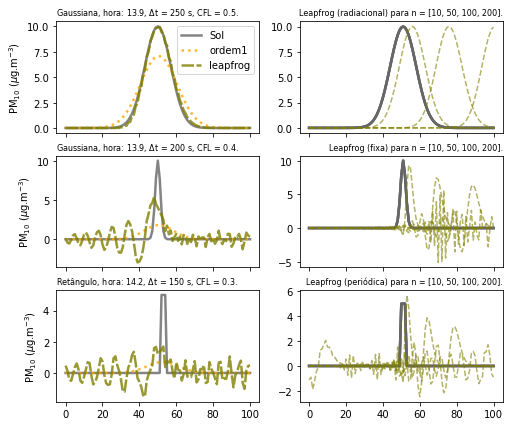

In [4]:
funs = ["Gaussiana", "Gaussiana", "Retângulo"]
aproxs = ["Sol", "ordem1", "leapfrog"]
aproxs2 = ["Sol","leapfrog"]
fronteras = ['radiacional', "fixa", "periódica"]
deltas = [250, 200, 150]
Nts    = [201, 251, 341]
E2     = {"G10":{}, "G2":{}, "R":{} }
pasos = [10,50,100,200]

for k, nr, fun, cond_front, dt, Nt in zip(Res.keys(), nrs, funs, fronteras, deltas, Nts):
    E2[k], CFL, hora = cond_fun_dt(fun, cond_front, dt, Nt, nr, aproxs2)

fig, ax = plt.subplots(3,2, figsize=(8,7), sharex=True)
for j, r, fun, nr, cond_front, dt, CFL, n in zip([0,1,2], Res, funs, nrs, fronteras, deltas, CFLs, Nts):
    for aprox in aproxs:
        ax[j,0].plot(Res[r][aprox][:, n-1], label=aprox, color=esquemas[aprox], alpha=.8, lw=2.5, linestyle=lineas[aprox])
    for aprox in aproxs2:
        for paso in pasos:
            if aprox == 'Sol':
                ax[j,1].plot(E2[r][aprox][:, 0], label=aprox, color=esquemas[aprox], alpha=.8, lw=2.5, linestyle=lineas[aprox])
            else:
                ax[j,1].plot(E2[r][aprox][:, paso], label=aprox, color=esquemas[aprox], alpha=.6, lw=1.5, linestyle='dashed')
    ax[j,0].set_ylabel(ylabel)
    ax[j,0].set_title(fun+f", hora: {round(((n-1)*dt/3600),1)}, $\Delta$t = {dt} s, CFL = {CFL}.",loc='left', fontsize=8)
    ax[j,1].set_title(f"Leapfrog ({cond_front}) para n = {pasos}.",loc='right', fontsize=8)
    
ax[0,0].legend()
fig.savefig("fig/" + 'exp1_exp2'+".png", 
            dpi = 300, bbox_inches='tight', facecolor='w')


## Analisis de dispersão
Caso leapfrog.

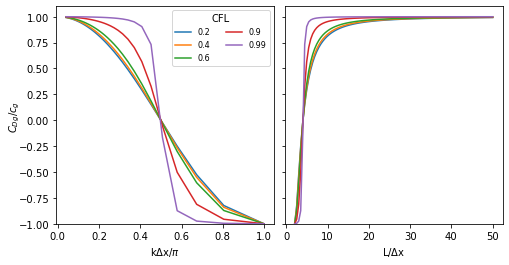

In [49]:
dx = 5000
L = np.linspace(2, 50, 100)*dx # comprimento de onda para dx constante
ks  = 2*np.pi/L
fig, ax = plt.subplots(1,2, figsize=(8,4),sharey=True, gridspec_kw={'wspace':.05})
for CFL in [.2, .4, .6, .9,.99]:
    Cd_c = np.cos(ks*dx)/(1-(CFL*np.sin(ks*dx))**2)**0.5
    ax[1].plot(L/dx, Cd_c, label=CFL)
    ax[0].plot(ks*dx/np.pi, Cd_c, label=CFL)
    ax[0].legend(fontsize=8, ncol=2, title='CFL')
    ax[1].set_ylim(-1,1.1)
fig.text(0.04, 0.5, '$C_{Dg}/c_g$', va='center', rotation='vertical')
ax[0].set_xlabel("k$\Delta$x/$\pi$")
ax[1].set_xlabel("L/$\Delta$x")
fig.savefig("fig/" + 'disp_leapfrog'+".png", 
            dpi = 300, bbox_inches='tight', facecolor='w')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1080x864 with 0 Axes>

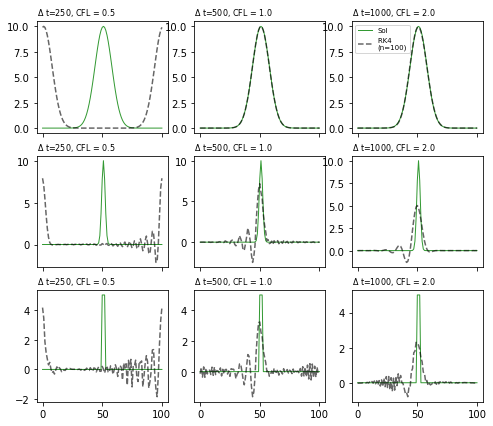

In [65]:
aproxs3 = ["Sol","RK4"]
pasos = [20,50,100,-1]
lineas = ["dotted", "dashed", "dashdot", 'solid']
Res = {"G10":{}, "G2":{}, "R":{} }  # numérico
nrs = [10,2,1]
funs = ["Gaussiana", "Gaussiana", "Retângulo"]
deltas = [250, 500, 1000]
Nt    = 101
CFLs = []
horas = []
ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"
cond_front = "periódica"

for dt in deltas:
    for nr, fun, r in zip(nrs, funs, Res.keys()):
        Res[r][dt], CFL, hora = cond_fun_dt(fun, cond_front, dt, Nt, nr, aproxs3)
    CFLs.append(CFL)
    horas.append(hora)

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig, ax = plt.subplots(3,3, figsize=(8,7), sharex=True)
for i, r in enumerate(Res.keys()):
    ax[0,2].legend(fontsize=7)
       
    for j, (dt, CFL) in enumerate(zip(deltas, CFLs)):
        ax[i,j].plot(Res[r][dt]["Sol"][:, 0], label="Sol", color='g', alpha=.8, lw=1, linestyle='solid')
        ax[i,j].plot(Res[r][dt]['RK4'][:, 100], label='RK4 \n(n=100)', color=esquemas["RK4"], alpha=.6, lw=1.5, linestyle='dashed')
        ax[i,j].set_title(f"$\Delta$ t={dt}, CFL = {CFL}", fontsize=8, loc='left')

fig.savefig("fig/" + 'RK4'+".png", 
            dpi = 300, bbox_inches='tight', facecolor='w')
